In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

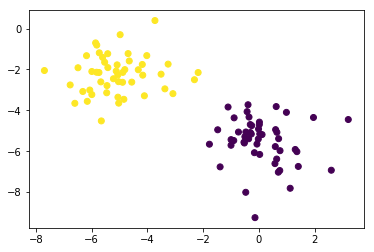

In [40]:
from sklearn.datasets.samples_generator import make_blobs
(X,y) = make_blobs(n_samples=100, n_features=2,centers=2, random_state=50)
plt.scatter(X[:,0], X[:,1], marker ='o', c=y)
plt.show()

In [42]:
y.shape

(100,)